# Project: Investigate TMDB dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This reports will explore how the popularity affected by factors, for example, budget, runtime and genres. Three questions will be answered using the data drawn from TMDB and they are:
> 1) Does spending more on budget cause a higher popularity?<br>
> 2) Is there a relationship with popularity and runtime?<br>
> 3) What kinds of genres are most popular?

In [1]:
#import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#show our raw dataset
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
#check if there are any missing values and the data type for each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning

Since we only investigate four variables: popularity, budget, runtime and genre. We can select those related columns and drop other irrelavant columns. And there are null values in genres. We will drop those rows with null values since it is a categorical data and cannot be replaced by performing regression to get the estimated value.

Popularity, budget and runtime are float, float and int data type so they are ready to be analysed without further action. For genres, we will just pull out the main genre (the first genres in the string) for the sake of simplicity in analysing the relationships between genre and popularity.

Also we will only use the main genre which is the first genre in genres to simplify the analysis and see which genre stands out. Using all the genres may cause uncomparable result since it will engender excessive individual categories.

In [4]:
#Choose the variables for our analysis
df = df[["popularity","budget","runtime","genres"]]

In [5]:
#Since there are null values in genres, we will drop the null values.
df.dropna(inplace=True)

In [6]:
#Extract the main genre from genres string
df['main_genre'] = df.genres.str.split(pat="|", expand=True)[0]

#Drop genres since we have main genre already
df.drop(columns="genres", inplace=True)

In [7]:
#find out if there are any values is 0
df.eq(0).any()

popularity    False
budget         True
runtime        True
main_genre    False
dtype: bool

In [8]:
#Since there are 0s in budget and run time column. We are going to fill it with mean value respectively.
df.loc[df["budget"] == 0,"budget"] = df.budget.mean()
df.loc[df["runtime"] == 0,"runtime"] = df.runtime.mean()

In [9]:
#check again to make sure no values is 0
df.eq(0).any()

popularity    False
budget        False
runtime       False
main_genre    False
dtype: bool

In [10]:
#Show cleaned dataset
df.head(1)

,popularity,budget,runtime,main_genre
0,32.985763,150000000.0,124.0,Action


In [11]:
#See the descriptive statistics of the data
df.describe()

,popularity,budget,runtime
count,10843.000000,1.084300e+04,10843.000000
mean,0.647456,2.232640e+07,102.420098
std,1.000986,2.803475e+07,30.827363
min,0.000065,1.000000e+00,2.000000
25%,0.208253,1.465672e+07,90.000000
50%,0.384555,1.465672e+07,99.000000
75%,0.715349,1.500000e+07,111.000000
max,32.985763,4.250000e+08,900.000000


<a id='eda'></a>
## Exploratory Data Analysis

### Does spending more on budget cause a higher popularity?

There is a moderate correlation (correlation coefficient:~0.516) between budget and popularity. It may not be an effective way if file makers want to achieve higher popularity by providing more budget for file production.

In [12]:
#Correlation for budget and popularity
df.corr(method="pearson").loc['popularity','budget']

0.515836730115566

Text(0.5, 1.0, 'Popularity VS Budget')

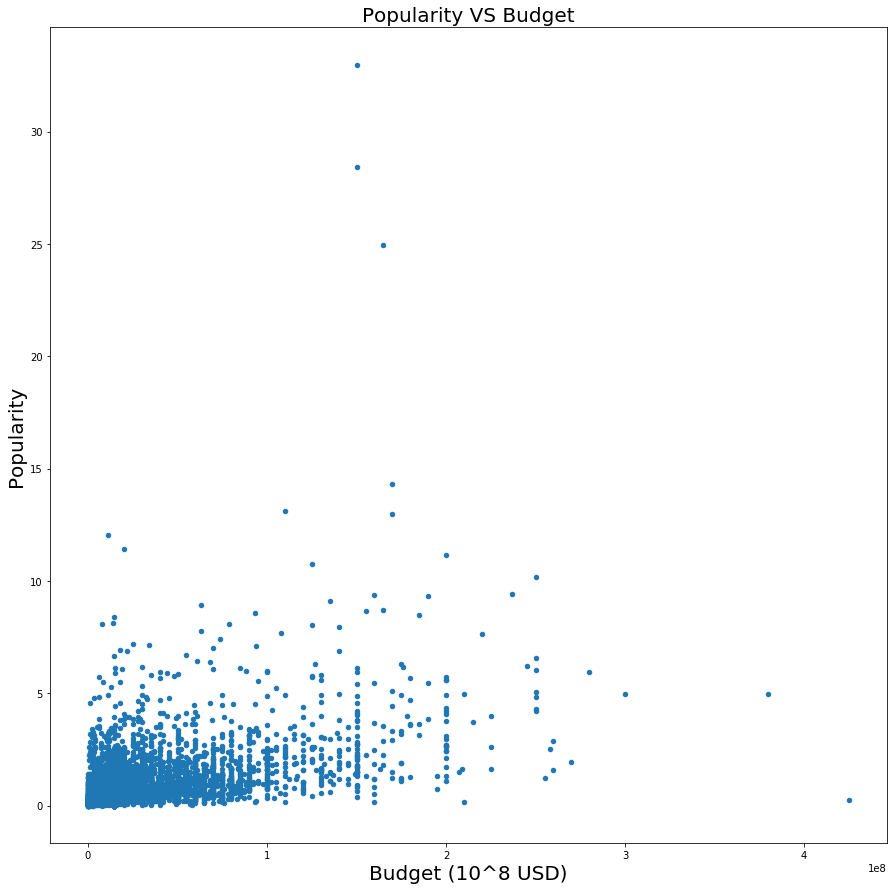

In [13]:
#Plot the Popularity VS Budget Scatter chart
df.plot.scatter(x='budget',y='popularity',figsize=(15,15))
plt.xlabel("Budget (10^8 USD)", fontsize=20)
plt.ylabel("Popularity", fontsize=20)
plt.title("Popularity VS Budget", fontsize=20)

### Is there a relationship with popularity and runtime?

There is a very weak correlation (correlation coefficient:~0.136) between run time and popularity. It shows that run time has almost no effect on popularity. And we can also see that most of the film are clustered in between 50 to 170 minutes run time.

In [14]:
#Corelation for Popularity and Run time 
df.corr(method="pearson").loc['popularity','runtime']

0.13633598749627288

Text(0.5, 1.0, 'Popularity VS Run Time')

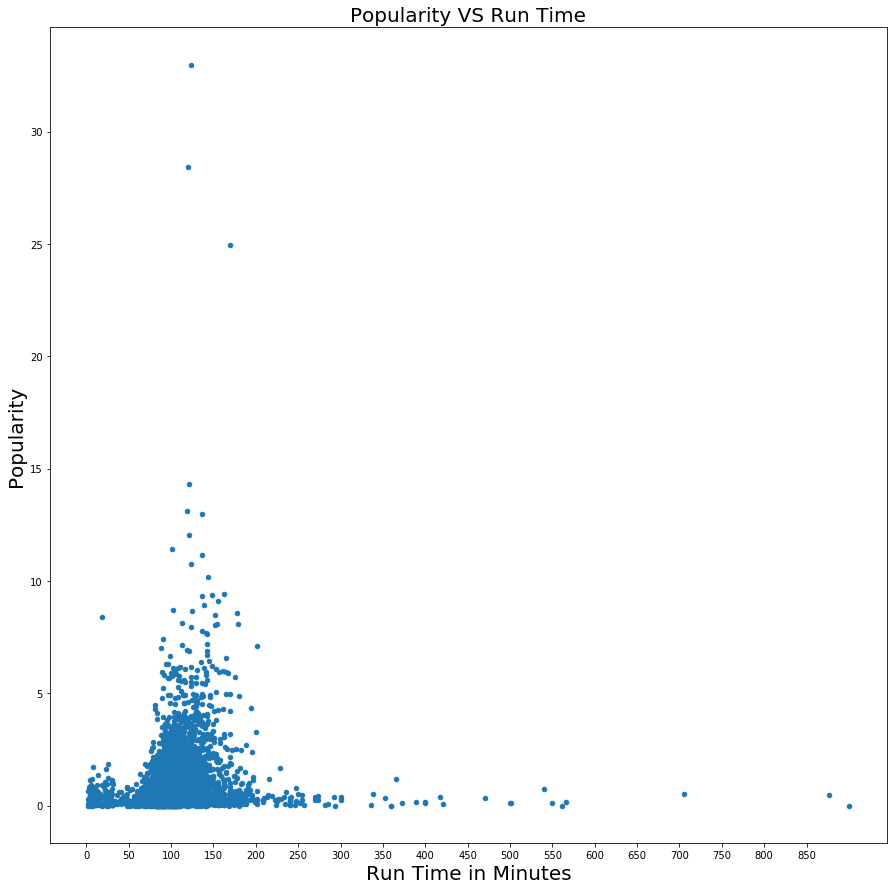

In [15]:
#Plot the Run Time vs Popularity Scatter chart
df.plot.scatter(x='runtime',y='popularity',figsize=(15,15))
plt.xticks(np.arange(0, 900, 50))
plt.xlabel("Run Time in Minutes", fontsize=20)
plt.ylabel("Popularity", fontsize=20)
plt.title("Popularity VS Run Time", fontsize=20)

### What kinds of genres are most popular?

The most popular genre is Adventure with 1.218 popularity while Foreign is the least popular with 0.167 popularity.

In [16]:
#Mean Popularity by Main Genre
mean_pop_by_genre_df = df.groupby('main_genre').mean()["popularity"]
sorted_mean_pop_by_genre = mean_pop_by_genre_df.sort_values(ascending=False)
sorted_mean_pop_by_genre

main_genre
Adventure          1.217868
Science Fiction    1.073096
Fantasy            0.865390
Action             0.836394
Animation          0.810370
War                0.767041
History            0.764636
Family             0.730987
Romance            0.704157
Crime              0.693807
Western            0.690646
Thriller           0.673381
Mystery            0.596896
Drama              0.552446
Comedy             0.537133
Horror             0.468611
Music              0.447730
TV Movie           0.246190
Documentary        0.177023
Foreign            0.167124
Name: popularity, dtype: float64

Text(0.5, 1.0, 'Mean Popularity')

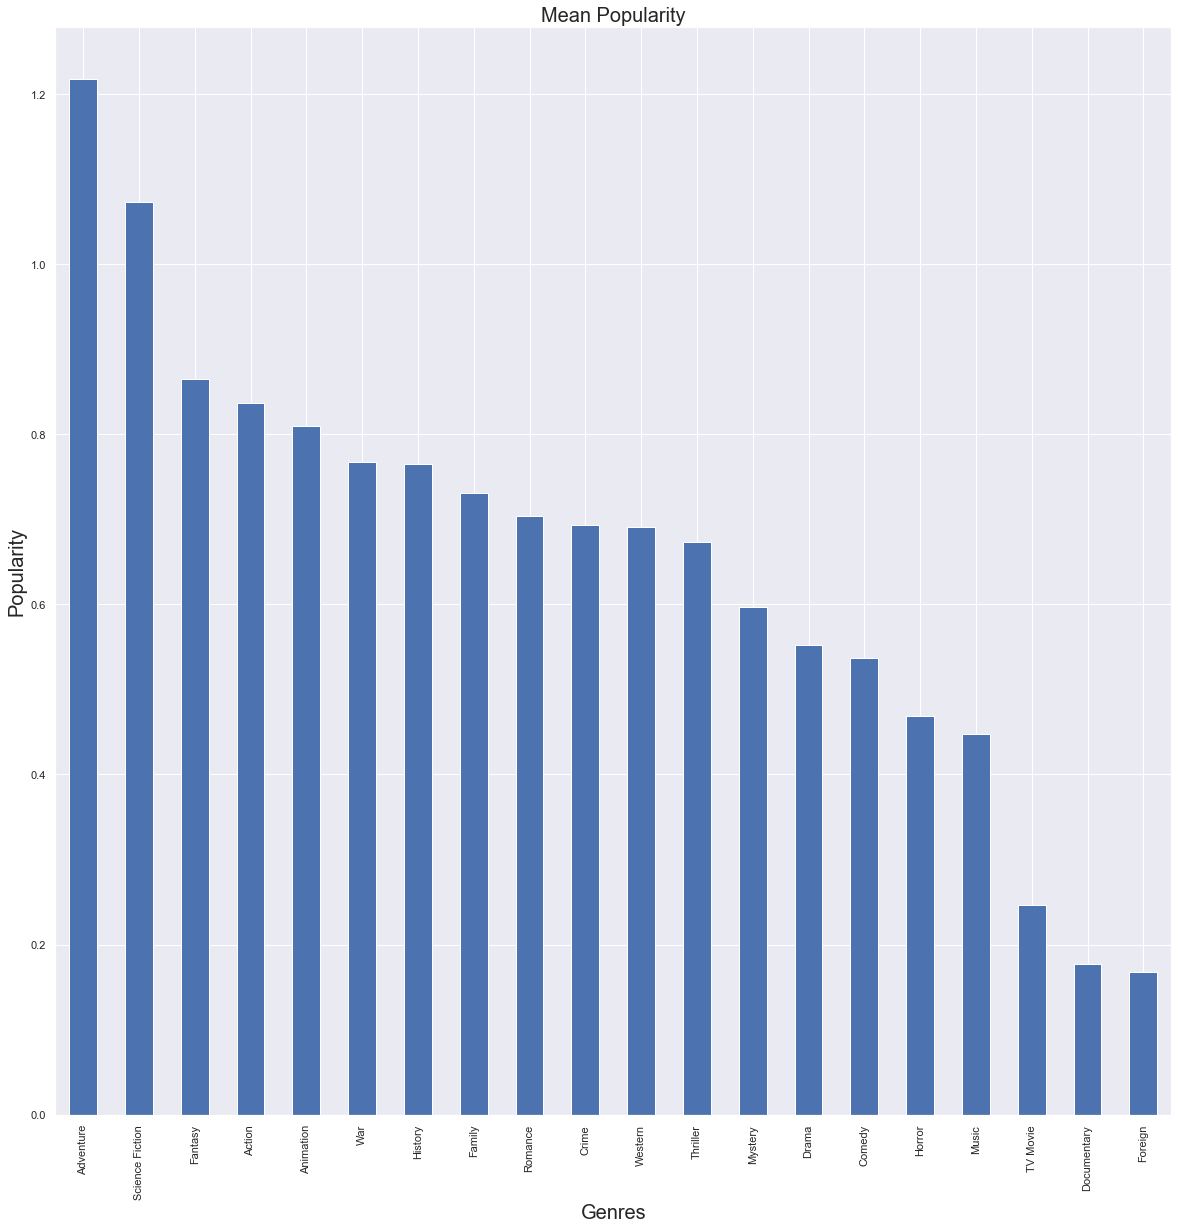

In [19]:
#Plot the Mean Popularity of each genre in bar chart
sorted_mean_pop_by_genre.plot(kind='bar', figsize=(20,20))
plt.xlabel("Genres", fontsize=20)
plt.ylabel("Popularity", fontsize=20)
plt.title("Mean Popularity", fontsize=20)

Even though the top 3 popular genres are Adventure, Sci-fi and Fantasy, the top 3 filed genres are Drama, Comedy and Action.

In [20]:
df.main_genre.value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               381
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: main_genre, dtype: int64

Text(0.5, 1.0, 'Count of Each Genre')

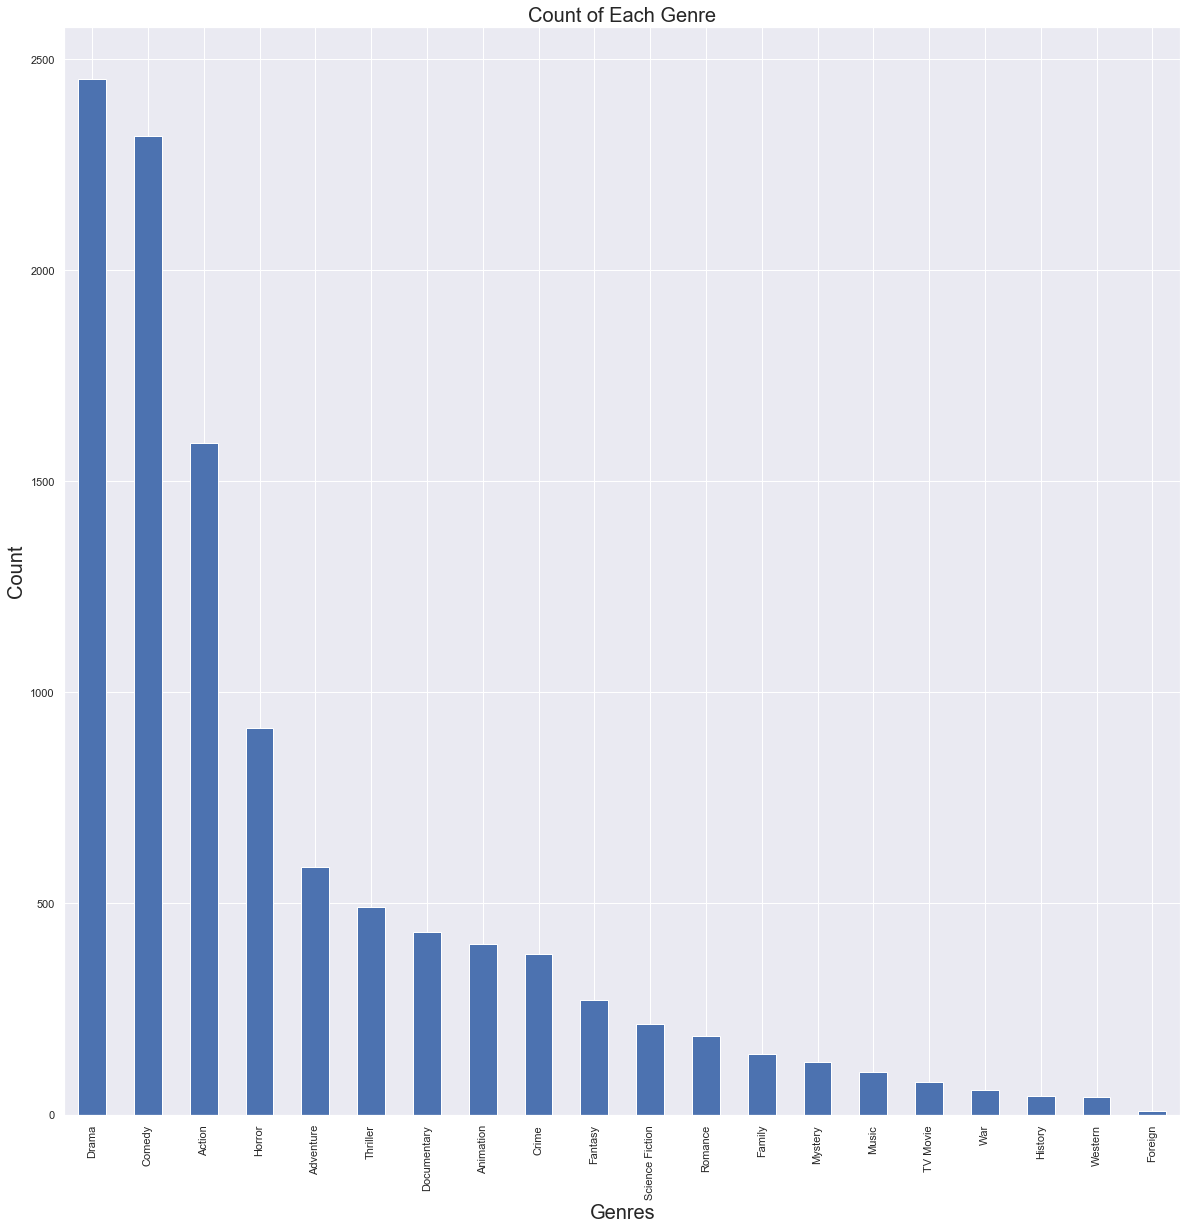

In [21]:
#Plot the total count of each genre in bar chart
df.main_genre.value_counts().plot(kind='bar', figsize=(20,20))
plt.xlabel("Genres", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Count of Each Genre", fontsize=20)

<a id='conclusions'></a>
## Conclusions

We have investigated the relationships between four variables including popularity, budget, runtime and genre. From the above analysis, we can see that spending more on budget has a moderate correlation (0.52) with a higher popularity which it implies the relationship between two variables is moderate. However, increasing the run time seems to have no relationship with popularity as we can see from its low correlation coefficient (0.14). And we also know that the most popular genre is Adventure (mean value: 1.217) and most filed genre is Drama (2453 times).

There are few limitations that we have in this analysis. Firstly, we used mean values to substitute the zero valus. We filled the mean value for those with 0 run time and 0 budget. It can be better calculated using regression to give a closer estimation for zero values. We can also do the regression by genre to give it a even more precise estimation.

Secondly, we truncated the genres to get the main genres. It may undervalue the combining effect of genres. For example, if we put more genres included to explore its popularity, it may cause a different result than what we have now. But having more genres included, it may cause comparison difficulty since each combination will take up a unique category and not stacked together for comparison.

Thirdly, deeper investigation may also affect the result. For example, taking out the effect of the director, will it cause the budget having stronger relationship with popularity?